In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
!nvidia-smi

Mon Jul 12 14:19:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA Tesla M60    On   | 00000000:04:00.0 Off |                    0 |
| N/A   25C    P8    14W / 150W |      0MiB /  7618MiB |      0%   E. Process |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## load data

In [2]:
galstar = pd.read_csv("data_and_information/galstar.csv")
galstar = galstar.iloc[:,1:]
galstar_labels = galstar['y']
galstar_images = galstar.iloc[:,1:]

In [3]:
galstar_images

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
0,0.005208,0.005283,0.005284,0.005249,0.005268,0.005311,0.005342,0.005191,0.005247,0.005321,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
1,0.005264,0.005220,0.005248,0.005340,0.005237,0.005248,0.005251,0.005168,0.005227,0.005344,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
2,0.005314,0.005302,0.005279,0.005258,0.005294,0.005229,0.005281,0.005198,0.005292,0.005332,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
3,0.005190,0.005255,0.005213,0.005263,0.005296,0.005288,0.005243,0.005332,0.005282,0.005212,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
4,0.005163,0.005178,0.005284,0.005220,0.005249,0.005287,0.005210,0.005289,0.005191,0.005239,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31793,0.005299,0.005320,0.005284,0.005161,0.005311,0.005254,0.005347,0.005219,0.005253,0.005299,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
31794,0.005254,0.005231,0.005184,0.005195,0.005266,0.005277,0.005281,0.005260,0.005268,0.005181,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
31795,0.005348,0.005299,0.005289,0.005273,0.005278,0.005297,0.005321,0.005338,0.005301,0.005268,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
31796,0.005380,0.005356,0.005259,0.005239,0.005345,0.005306,0.005325,0.005305,0.005281,0.005350,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257


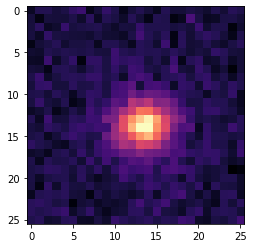

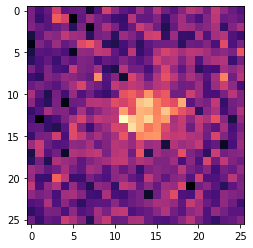

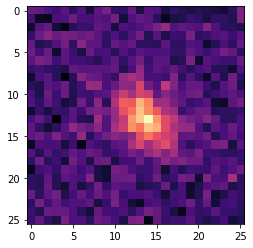

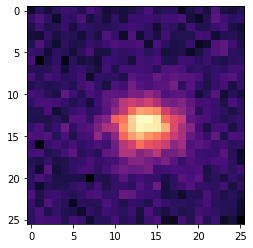

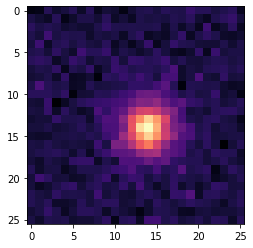

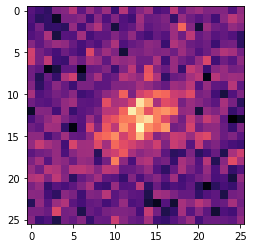

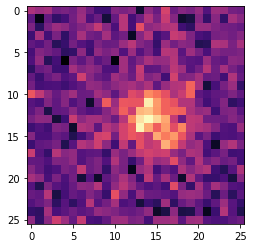

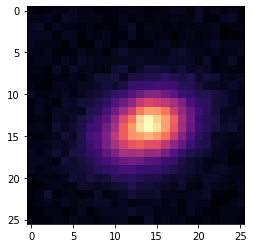

In [7]:
data = galstar_images.values
labels = galstar_labels.values

    
data_pre = data.reshape(31798,8,26,26)  #griz (psf-g, psf-r,psf-i,psf-z) 8 channels,they claim up to mag27 in the i band


for i in range(8):
    plt.imshow(data_pre[i,0,:,:],cmap='magma')
    plt.show()

## normalize image

In [4]:
vec_one_ = np.ones((26,26))

for i in tqdm(range(31798)):
    for j in range(8):
        
        
        data_pre[i,j,:,:] = data_pre[i,j,:,:]- np.amin(data_pre[i,j,:,:])*vec_one_  #background subtract
        data_pre[i,j,:,:] = data_pre[i,j,:,:] / np.max(data_pre[i,j,:,:])  #normalize between 0 and 1
        
        assert np.max(data_pre[i,j,:,:]) ==1 and np.min(data_pre[i,j,:,:]) ==0,'check normalization'


100%|██████████| 31798/31798 [00:22<00:00, 1424.36it/s]


In [5]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import torchvision as tv
from torch.utils.data import DataLoader,TensorDataset
from torch import Tensor

if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

device = torch.device(device)
print(device)

cuda:0


## shuffle, transform to tensor

In [6]:
torch.cuda.empty_cache() # does not do anything

In [7]:
dataset = data_pre
train_label = labels.reshape(-1,1)



data_tensor = TensorDataset(Tensor(dataset),Tensor(train_label))

train_loader = torch.utils.data.DataLoader(dataset = data_tensor,
                                          batch_size = 15899,
                                          shuffle = True,
                                        )
dataiter = iter(train_loader)
img,label = dataiter.next()

In [8]:
print(img.shape)
print(label.shape)

torch.Size([15899, 8, 26, 26])
torch.Size([15899, 1])


## Model

In [9]:
class BobNet(nn.Module):
    def __init__(self):
        super().__init__()        
        
        self.conv1 = nn.Conv2d(8,16,3,stride = 1,padding = 0)#16,24x24 ()
        self.conv2 = nn.Conv2d(16,32,3,stride =1,padding = 0) #22x22,32#  batchnorm
        self.fc1 = nn.Linear(22*22*32,100)
        self.fc2 = nn.Linear(100,20) #dropout
        self.fc3 = nn.Linear(20,1)
        
    def forward(self,x):
        x = torch.nn.functional.relu(self.conv1(x)) #leaky relu, elu
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.flatten(x,1)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x =  torch.sigmoid(self.fc3(x)) #binary, 0,1
        
        return x
model = BobNet().to(device)

In [10]:
from sklearn.metrics import accuracy_score
def eval(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred>0.5)
    return accuracy
    

## train

In [20]:
criterion = nn.BCELoss() #binary cross entrypy loss #different loss function?

#98% training, 1%val 1% test

optimizer = torch.optim.Adam(model.parameters(),lr = 0.00010,weight_decay = 1e-5)

num_epochs = 400
output2 = []
Acc = []
for epoch in range(num_epochs):
    for img,lab in train_loader:
     
        
        img = img.to(device)
        lab= lab.to(device)
        
        out = model(img)      
        
        acc = eval(lab.cpu(),out.cpu())
        print(epoch,acc)
        Acc.append(acc)
        
        loss = criterion(out,lab)
        
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    #print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
    output2.append(loss.item())

0 0.9860368576640041
0 0.9408767847034405
1 0.981885653185735
1 0.9654066293477577
2 0.9535819862884458
2 0.9778602427825649
3 0.9847160198754639
3 0.9805648153971948
4 0.9748411849801875
4 0.9723253034782062
5 0.9749040820177369
5 0.9817598591106359
6 0.9851562991383106
6 0.9816340650355369
7 0.9806277124347443
7 0.9757846405434304
8 0.9804390213220957
8 0.9816340650355369
9 0.9853449902509592
9 0.9840870494999685
10 0.9836467702371219
10 0.9806906094722938
11 0.9822630354110321
11 0.9855336813636077
12 0.9849047109881125
12 0.9858481665513554
13 0.9847160198754639
13 0.9832693880118246
14 0.9845902258003648
14 0.9854707843260583
15 0.9867916221145984
15 0.9845902258003648
16 0.9837725643122209
16 0.9860368576640041
17 0.9854078872885087
17 0.9866658280394993
18 0.9860997547015535
18 0.9847160198754639
19 0.9862884458142022
19 0.9849047109881125
20 0.9860368576640041
20 0.9866029310019498
21 0.9857852695138059
21 0.9850305050632115
22 0.9841499465375181
22 0.9877350776778414
23 0.9860

184 0.9883640480533367
184 0.9877350776778414
185 0.9873576954525441
185 0.9884898421284357
186 0.9883640480533367
186 0.9879866658280395
187 0.986980313227247
187 0.9883640480533367
188 0.988049562865589
188 0.9878608717529405
189 0.988993018428832
189 0.9860997547015535
190 0.9874205924900937
190 0.9884898421284357
191 0.9888043273161834
191 0.986980313227247
192 0.9881753569406881
192 0.9881753569406881
193 0.9886785332410843
193 0.9873576954525441
194 0.9887414302786339
194 0.9874834895276432
195 0.9881753569406881
195 0.9888043273161834
196 0.988049562865589
196 0.9882382539782376
197 0.9877979747153909
197 0.9888043273161834
198 0.9879237687904899
198 0.9884269450908862
199 0.9883640480533367
199 0.9886156362035348
200 0.9884269450908862
200 0.9881124599031386
201 0.9888043273161834
201 0.9878608717529405
202 0.9882382539782376
202 0.9882382539782376
203 0.9881124599031386
203 0.9885527391659853
204 0.9875463865651928
204 0.9894332976916788
205 0.9886785332410843
205 0.9879866658

363 0.9909428265928675
363 0.9915717969683628
364 0.9913202088181646
364 0.9908799295553179
365 0.9921378703063086
365 0.9896219888043273
366 0.9918233851185609
366 0.9903767532549217
367 0.9904396502924713
367 0.9907541354802188
368 0.9911944147430656
368 0.9909428265928675
369 0.9917604880810114
369 0.9908170325177684
370 0.9911944147430656
370 0.9909428265928675
371 0.9911315177055161
371 0.9905025473300207
372 0.99194917919366
372 0.9906912384426694
373 0.9909428265928675
373 0.9912573117806152
374 0.9910686206679665
374 0.9911944147430656
375 0.9928926347569029
375 0.9894332976916788
376 0.9908799295553179
376 0.9910057236304171
377 0.9913831058557142
377 0.9911944147430656
378 0.9922007673438581
378 0.9894332976916788
379 0.9911315177055161
379 0.9908799295553179
380 0.9906283414051198
380 0.9916346940059123
381 0.9910686206679665
381 0.9915717969683628
382 0.9916975910434619
382 0.9907541354802188
383 0.9908170325177684
383 0.9905654443675703
384 0.9911315177055161
384 0.9911944

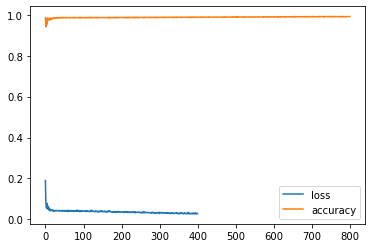

In [21]:
plt.plot(output2,label='loss')
plt.legend()
plt.plot(Acc,label = 'accuracy')
plt.legend()
plt.show()

In [22]:
print('max accuracy:',np.amax(Acc))

max accuracy: 0.9928926347569029


In [23]:
y_prediction = out.detach().cpu().numpy()
np_y_pred = np.where(y_prediction < 0.5,0,1)
np_y_true = lab.cpu().numpy()

## F1 score

In [24]:
from sklearn.metrics import f1_score
f1_score(np_y_true,np_y_pred)

0.9895577395577394

## confusion matrix

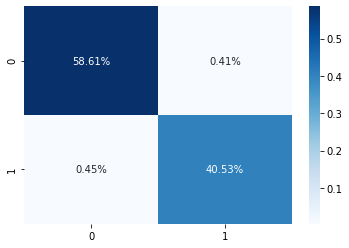

In [25]:

from sklearn.metrics import confusion_matrix
CFM = confusion_matrix(np_y_true,np_y_pred)

import seaborn as sns
sns.heatmap(CFM/np.sum(CFM),annot=True,fmt='.2%',cmap = 'Blues')

## AUC ,ROC

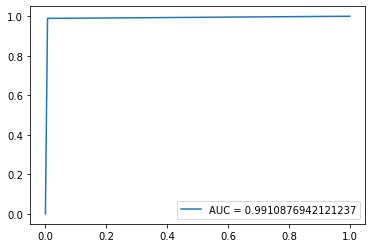

In [26]:
from sklearn.metrics import roc_auc_score,roc_curve

auc =roc_auc_score(np_y_true,np_y_pred)

fpr,tpr,__ = roc_curve(np_y_true,np_y_pred)
plt.plot(fpr,tpr,label = 'AUC = '+str(auc))
plt.legend(loc=4)
plt.show()